In [ ]:
# Import some common packages
import os
import numpy as np


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# Your code goes here for this section, make sure you also include the output to answer the above questions.

def loadChildData(csv_name):
  # The column names are adopted from the dataset page on Kaggle
  childData = pd.read_csv(csv_name)
  return childData
# childData = loadChildData('/content/reduced_NSCH_CAHMI.csv')
childData = loadChildData('/content/2021 NSCH_Topical_CAHMI_DRC_1.csv')

childData = childData[~childData['BMICLASS'].isin([90, 99])] #get rid of "missing" values (90,99)



<ipython-input-5-1d7f0b2f0e0a>:24: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  childData = pd.read_csv(csv_name)


In [ ]:
childData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20091 entries, 1 to 50890
Columns: 864 entries, FIPSST to npm15AdIns_21
dtypes: float64(1), int64(862), object(1)
memory usage: 132.6+ MB


In [ ]:
childData.describe()

,FIPSST,STRATUM,HHID,FORMTYPE,TOTKIDS_R,TENURE,HHLANGUAGE,SC_AGE_YEARS,SC_SEX,K2Q35A_1_YEARS,...,npm9bullied_21,npm9bully_21,npm10PrVi_21,npm11MHCSHCN_21,npm11MHnonCSHCN_21,npm12TransCSHCN_21,npm12TransNonCSHCN_21,npm13_2DePrev_21,npm14_2Smoke_21,npm15AdIns_21
count,20091.000000,20091.000000,2.009100e+04,20091.000000,20091.000000,20091.000000,20091.000000,20091.000000,20091.000000,20091.000000,...,20091.000000,20091.000000,20091.000000,20091.000000,20091.000000,20091.000000,20091.000000,20091.000000,20091.000000,20091.000000
mean,29.632074,1.050769,2.115073e+07,2.782042,1.804091,1.475188,1.670449,13.771191,1.480514,91.828331,...,22.645015,22.486238,22.009407,65.960082,30.534518,70.776218,44.179483,1.472251,4.007217,1.632074
std,15.797298,0.219531,8.629174e+04,0.412869,0.886796,0.787356,7.396133,2.294551,0.499633,16.554348,...,39.320973,39.405948,38.921578,43.258048,43.292824,39.696270,45.356668,5.735680,14.284655,5.437753
min,1.000000,1.000000,2.100001e+07,2.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,16.000000,1.000000,2.107629e+07,3.000000,1.000000,1.000000,1.000000,12.000000,1.000000,95.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,90.000000,2.000000,1.000000,2.000000,1.000000
50%,31.000000,1.000000,2.115151e+07,3.000000,2.000000,1.000000,1.000000,14.000000,1.000000,95.000000,...,1.000000,1.000000,1.000000,95.000000,2.000000,95.000000,2.000000,1.000000,2.000000,1.000000
75%,41.000000,1.000000,2.122533e+07,3.000000,2.000000,2.000000,1.000000,16.000000,2.000000,95.000000,...,2.000000,2.000000,2.000000,95.000000,95.000000,95.000000,90.000000,1.000000,2.000000,2.000000
max,56.000000,2.000000,2.130000e+07,3.000000,4.000000,4.000000,99.000000,17.000000,2.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000


In [ ]:
#Feature set from Ferdowsky et al. (https://www.sciencedirect.com/science/article/pii/S2666518221000401)
#Height, Weight, Gender, Age, Diet, Exercise regularly, Gym regularly, Physical activity against will, Lazy time, Depression, Insomnia, Social Media, Screen-time, Fast-food, Sugary foods, Diabetes, Asthma, Heart disease, Social isolation, smoking
features = ['FWC', 'SC_SEX','SC_AGE_YEARS', 'PHYSACTIV',  'K2Q32A', 'K2Q34A', 'OVERWEIGHT', 'K7Q30', 'K11Q62', 'S9Q34', 'K2Q01', 'OUTDOORSWKDAY', 'OUTDOORSWKEND', 'WGTCONC', 'SC_ASIAN', 'SC_AIAN', 'SC_NHPI', 'depress_21', 'anxiety_21', 'HrsSleep_21', 'ScreenTime_21', 'ACEincome2_21', 'SUGARDRINK', 'VEGETABLES', 'FRUIT', 'diabetes_21', 'heart_21', 'bully_21', 'bullied_21', 'smoking_21', 'MotherHSt_21', 'FatherHSt_21', 'BREATHING', ]

alt_features = ['FWC', 'SC_SEX','SC_AGE_YEARS', 'PHYSACTIV',  'K2Q32A', 'K2Q34A', 'OVERWEIGHT', 'K7Q30', 'K11Q62', 'S9Q34', 'K2Q01', 'OUTDOORSWKDAY', 'OUTDOORSWKEND', 'WGTCONC', 'SC_ASIAN', 'SC_AIAN', 'SC_NHPI', 'depress_21', 'anxiety_21', 'HrsSleep_21', 'ScreenTime_21', 'ACEincome2_21', 'SUGARDRINK', 'VEGETABLES', 'FRUIT', 'diabetes_21', 'heart_21', 'bully_21', 'bullied_21', 'smoking_21', 'MotherHSt_21', 'FatherHSt_21', 'BREATHING', 'age5_21', 'sex_21', 'race4_21', 'HHLanguage_21', 'povlev4_21', 'AdultEduc_21', 'FamCount_21', 'ChHlthSt_21', 'SugarDrink_21', 'vegetables_21', 'ToldOverweight_21', 'PhysAct_21', 'OutdrsWkDay_21', 'OutdrsWkend_21', 'WgtConcn_21', 'allergies_21', 'arthritis_21', 'asthma_21', 'diabetes_21', 'heart_21', 'depress_21', 'behavior_21', 'bully_21','bullied_21', 'MakeFriend_21', 'sports_21', 'clubs_21','ACEincome_21', 'ACEdivorce_21', 'ACEdeath_21', 'HrsSleep_21', 'FoodSit_21', 'WIC_21', 'FoodStamp_21']

data_list = [
    "age3_21",
    "age5_21",
    "sex_21",
    "race4_21",
    "raceASIA_21",
    "race7_21",
    "PrntNativity_21",
    "PrntNativity2_21",
    "HHLanguage_21",
    "hisplang_21",
    "famstruct5_21",
    "famstruct3_21",
    "povlev4_21",
    "povSCHIP_21",
    "MilitarySt_21",
    "AdultEduc_21",
    "BornUSA_21",
    "FamCount_21",
    "ChHlthSt_21",
    "TeethCond_21",
    "toothache_21",
    "gumbleed_21",
    "cavities_21",
    "ctOralProb_21",
    "OralProb_21",
    "BrstEver_21",
    "ExBrstFd_21",
    "SugarDrink_21",
    "vegetables_21",
    "fruit_21",
    "ToldOverweight_21",
    "PhysAct_21",
    "OutdrsWkDay_21",
    "OutdrsWkend_21",
    "WgtConcn_21",
    "LowBWght_21",
    "VeryLBWght_21",
    "BornPre_21",
    "allergies_21",
    "arthritis_21",
    "asthma_21",
    "BloodScr_21",
    "blood_21",
    "BrainInjTold_21",
    "palsy_21",
    "CystFibScr_21",
    "CystFib_21",
    "diabetes_21",
    "DownSynd_21",
    "seizure_21",
    "GeneticScr_21",
    "genetic_21",
    "heart_21",
    "heart_both_21",
    "HeartBorn_21",
    "headache_21",
    "tourette_21",
    "anxiety_21",
    "depress_21",
    "behavior_21",
    "DevDelay_21",
    "IntDisab_21",
    "speech_21",
    "learning_21",
    "autism_21",
    "ADHD_21",
    "hearing_21",
    "vision_21",
    "CondCnt24_21",
    "Cond2more24_21",
    "AllerSev_21",
    "ArthrSev_21",
    "AsthmSev_21",
    "BloodSev_21",
    "PalsySev_21",
    "CystSev_21",
    "DiabetSev_21",
    "SeizSev_21",
    "GenetSev_21",
    "HeartSev_21",
    "HeadSev_21",
    "TouretSev_21",
    "AnxietSev_21",
    "DepresSev_21",
    "BehavSev_21",
    "DevDelSev_21",
    "IntDisSev_21",
    "SpeechSev_21",
    "LearnSev_21",
    "AutismSev_21",
    "ADHDSev_21",
    "DiffBreath_21",
    "DiffSwall_21",
    "DiffDigest_21",
    "DiffPain_21",
    "DiffHands_21",
    "DiffCoor_21",
    "DiffMem_21",
    "DiffWalk_21",
    "DiffDress_21",
    "DiffErrand_21",
    "cntdiff",
    "Diff2more_21",
    "rxmeds_21",
    "serve_21",
    "func_21",
    "therapy_21",
    "mhealth_21",
    "qualnum_21",
    "CSHCN_21",
    "CSHCNtype_21",
    "CSHCNComplex_21",
    "CSHCNComplex2_21",
    "mhneeds_21",
    "mhneeds2_21",
    "qualnum4_21",
    "DailyAct_21",
    "bully_21",
    "bullied_21",
    "tender_21",
    "resil0to5_21",
    "curious0to5_21",
    "smile_21",
    "flrsh0to5ct",
    "flrish0to5_21",
    "curious6to17_21",
    "finishes_21",
    "resil6to17_21",
    "flrsh6to17ct",
    "flrish6to17_21",
    "argue_21",
    "MakeFriend_21",
    "ADHDind_21",
    "ADHDSevInd_21",
    "ADHDMed_21",
    "ADHDBehTreat_21",
    "AutismInd_21",
    "ASDSevInd_21",
    "ASDMed_21",
    "ASDBehTreat_21",
    "ASDAge_21",
    "ASDDrType_21",
    "MedEmotion_21",
    "MEDB10ScrQ5_21",
    "CurrIns_21",
    "InsGap_21",
    "NoCovEmp_21",
    "NoCovOverdue_21",
    "NoCovUnafford_21",
    "NoCovBenInadeq_21",
    "NoCovProvInadeq_21",
    "NoCovRenew_21",
    "instype_21",
    "InsAdeq_21",
    "benefits_21",
    "allows_21",
    "expense_21",
    "insurance_21",
    "InsMentH_21",
    "OutOfPckt_21",
    "MedCare_21",
    "VideoPhone_21",
    "PrevMed_21",
    "VisitTime_21",
    "PrivateTalk_21",
    "DentCare_21",
    "DentCareR_21",
    "PrevDent_21",
    "DentCheck_21",
    "DentCleaning_21",
    "DentInstruct_21",
    "DentXray_21",
    "fluoride_21",
    "sealant_21",
    "MedDentCare_21",
    "MentHCare_21",
    "MentHDiff_21",
    "SpecCare_21",
    "SpCareDiff_21",
    "EyeDoctor_21",
    "EyeExam_21",
    "EyeGlassContact_21",
    "VisionDisorder_21",
    "VisnScrnOther_21",
    "RecEyeExam_21",
    "ERVisit_21"]

In [ ]:
print(len(alt_features))

67


In [ ]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedShuffleSplit


 #90 or 99 means missing or not in our age group
X_train, X_test, y_train, y_test = train_test_split(childData.drop(["BMICLASS", "BMI4_21", "BMI3_21"],axis = 1), childData["BMICLASS"], stratify = childData["BMICLASS"], test_size=0.2, random_state=42)

print(X_train.shape)

class columnTransformer():
    def __init__(self,columns):
        self.columns=columns

    #drop uncorrelated columns and "missing" obesity values
    def transform(self,X,y=None):
        return X[self.columns]

    def fit(self, X, y=None):
        return self

transform_pipeline = Pipeline([
        # ('columnDropper', columnTransformer(data_list)),
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

prepared_data = transform_pipeline.fit_transform(X_train)
prepared_X_test = transform_pipeline.fit_transform(X_test)

print(prepared_data.shape)
# print(prepared_data[:3])


(16072, 861)
(16072, 861)


Fitting 2 folds for each of 4 candidates, totalling 8 fits
{'C': 1, 'kernel': 'sigmoid'}
              precision    recall  f1-score   support

           1       0.62      0.38      0.47       260
           2       0.81      0.98      0.89      2542
           3       0.89      0.53      0.66       606
           4       0.99      0.71      0.82       611

    accuracy                           0.83      4019
   macro avg       0.83      0.65      0.71      4019
weighted avg       0.84      0.83      0.82      4019



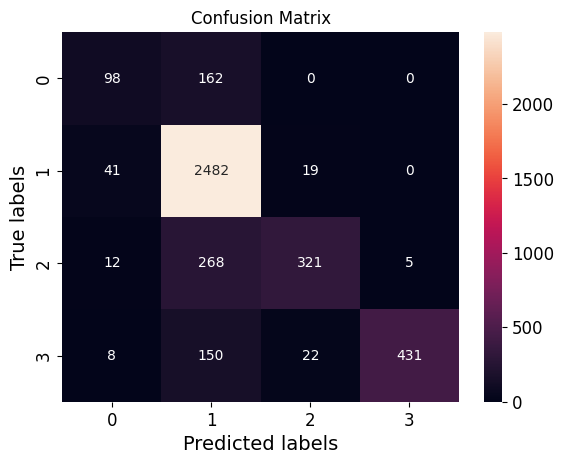

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Define the parameter grid to search
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': [ 'sigmoid']}

# Create the SVM classifier
svm_clf = SVC(gamma="auto", random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm_clf, param_grid, cv=2, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(prepared_data, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(best_params)





              precision    recall  f1-score   support

           1       0.62      0.38      0.47       260
           2       0.81      0.98      0.89      2542
           3       0.89      0.53      0.66       606
           4       0.99      0.71      0.82       611

    accuracy                           0.83      4019
   macro avg       0.83      0.65      0.71      4019
weighted avg       0.84      0.83      0.82      4019



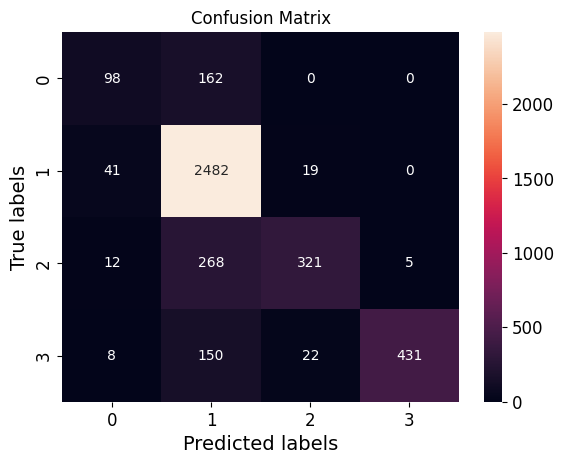

In [ ]:
# Train a new SVM classifier with the best parameters
best_svm_clf = SVC(gamma="auto", probability = True, random_state=42, **best_params)
best_svm_clf.fit(prepared_data, y_train)

# Make predictions on the test set
svm_pred = best_svm_clf.predict(prepared_X_test)

# Print the classification report
print(classification_report(y_test, svm_pred))

cm = confusion_matrix(y_test, svm_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


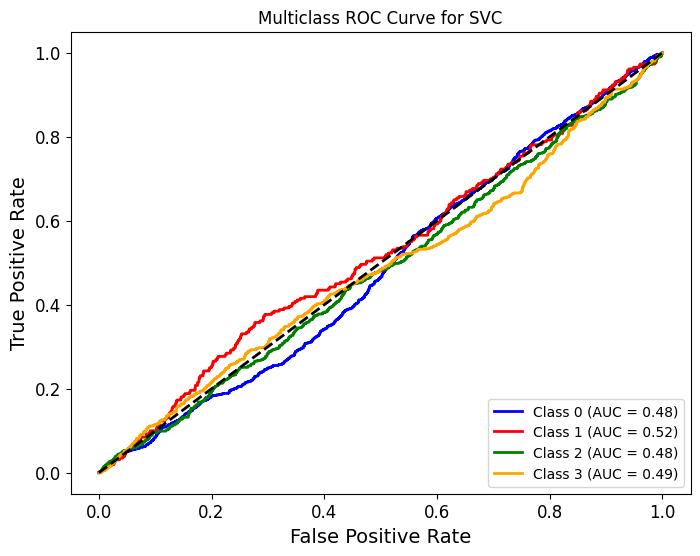

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle


y_test_bin = label_binarize(y_test, classes=childData["BMICLASS"].unique())


# Get predicted probabilities for each class
y_score = best_svm_clf.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])  # Add more colors as needed
for i, color in zip(range(y_test_bin.shape[1]), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label='Class {} (AUC = {:.2f})'.format(i, roc_auc))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve for SVC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# # Create a Decision Tree Classifier
# dt_clf = DecisionTreeClassifier(random_state=42)

# # Define the hyperparameter grid
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [10, 20, 40, 50],
#     'min_samples_split': [2, 5, 10],
# }

# # Create GridSearchCV object
# grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# # Fit the model with the hyperparameter combinations
# grid_search.fit(prepared_data, y_train)

# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)

# # Print the classification report with the best estimator
# print(classification_report(y_test, grid_search.best_estimator_.predict(prepared_X_test)))


# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(prepared_data, y_train)
dt_pred = dt_clf.predict(prepared_X_test)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_pred))



Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       0.11      0.13      0.12       260
           2       0.71      0.67      0.69      2542
           3       0.17      0.19      0.18       606
           4       0.39      0.38      0.38       611

    accuracy                           0.52      4019
   macro avg       0.34      0.34      0.34      4019
weighted avg       0.54      0.52      0.53      4019



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.001, 0.01],
    'max_depth': [3, 4],
    # Add other parameters you want to tune
}

# Create the GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(prepared_data, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Create a new GradientBoostingClassifier with the best parameters
best_gb_clf = GradientBoostingClassifier(**best_params, random_state=42)

# Fit the model with the best parameters to the data
best_gb_clf.fit(prepared_data, y_train)

# Print the classification report
print(classification_report(y_test, best_gb_clf.predict(prepared_X_test)))

# # Gradient Boosting Classifier
# gb_clf = GradientBoostingClassifier(random_state=42)
# gb_clf.fit(prepared_data, y_train)
# gb_pred = gb_clf.predict(prepared_X_test)
# print("\nGradient Boosting Classification Report:")
# print(classification_report(y_test, gb_pred))



Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           1       0.20      0.00      0.01       260
           2       0.71      0.97      0.82      2542
           3       0.27      0.03      0.05       606
           4       0.64      0.48      0.55       611

    accuracy                           0.69      4019
   macro avg       0.45      0.37      0.36      4019
weighted avg       0.60      0.69      0.61      4019



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define the parameter grid for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    # Add other parameters you want to tune
}

# Create the Logistic Regression classifier
log_clf = LogisticRegression(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=log_clf, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(prepared_data, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Create a new Logistic Regression classifier with the best parameters
best_log_clf = LogisticRegression(**best_params, random_state=42)

# Fit the model with the best parameters to the data
best_log_clf.fit(prepared_data, y_train)

# Print the classification report
print(classification_report(y_test, best_log_clf.predict(prepared_X_test)))

# Logistic Regression Classifier
# lr_clf = LogisticRegression(random_state=42)
# lr_clf.fit(prepared_data, y_train)
# lr_pred = lr_clf.predict(prepared_X_test)
# print("\nLogistic Regression Classification Report:")
# print(classification_report(y_test, lr_pred))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       260
           2       0.67      0.98      0.80      2542
           3       0.07      0.00      0.00       606
           4       0.65      0.29      0.41       611

    accuracy                           0.67      4019
   macro avg       0.35      0.32      0.30      4019
weighted avg       0.53      0.67      0.57      4019



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (30, 20, 10)],  # Example values for the hidden layers
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    # Add other parameters you want to tune
}

# Create the MLP Classifier
mlp_clf = MLPClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=mlp_clf, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(prepared_data, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Create a new MLP Classifier with the best parameters
best_mlp_clf = MLPClassifier(**best_params, random_state=42)

# Fit the model with the best parameters to the data
best_mlp_clf.fit(prepared_data, y_train)

# Print the classification report
print(classification_report(y_test, best_mlp_clf.predict(prepared_X_test)))

# MLP Classifier
# mlp_clf = MLPClassifier(random_state=42)
# mlp_clf.fit(prepared_data, y_train)
# mlp_pred = mlp_clf.predict(prepared_X_test)
# print("\nMLP Classification Report:")
# print(classification_report(y_test, mlp_pred))




MLP Classification Report:
              precision    recall  f1-score   support

           1       0.07      0.03      0.04       260
           2       0.71      0.86      0.78      2542
           3       0.24      0.11      0.15       606
           4       0.48      0.44      0.46       611

    accuracy                           0.63      4019
   macro avg       0.37      0.36      0.36      4019
weighted avg       0.56      0.63      0.59      4019



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize
from yellowbrick.classifier import ClassificationReport
import seaborn as sns
import matplotlib.pyplot as plt


# Initialize an empty list to store DataFrames for each model
dfs = []

preds = [svm_pred, dt_pred, gb_pred,lr_pred, mlp_pred]
models = ['SVM', 'DT', 'GB', 'LR', 'MLP']

for pred, model in zip(preds, models):

    # Generate classification report
    report_dict = classification_report(y_test, pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()

    # Add a column to identify the model
    report_df['Model'] = model

    # Append the DataFrame to the list
    dfs.append(report_df)

# Concatenate DataFrames from all models
combined_df = pd.concat(dfs, ignore_index=True)

# Print the combined DataFrame
print(combined_df)



    precision    recall  f1-score      support Model
0    0.616352  0.376923  0.467780   260.000000   SVM
1    0.810581  0.976397  0.885796  2542.000000   SVM
2    0.886740  0.529703  0.663223   606.000000   SVM
3    0.988532  0.705401  0.823305   611.000000   SVM
4    0.829062  0.829062  0.829062     0.829062   SVM
5    0.825551  0.647106  0.710026  4019.000000   SVM
6    0.836553  0.829062  0.815693  4019.000000   SVM
7    0.113712  0.130769  0.121646   260.000000    DT
8    0.705760  0.669945  0.687386  2542.000000    DT
9    0.165007  0.191419  0.177235   606.000000    DT
10   0.385762  0.381342  0.383539   611.000000    DT
11   0.519035  0.519035  0.519035     0.519035    DT
12   0.342560  0.343369  0.342451  4019.000000    DT
13   0.537274  0.519035  0.527671  4019.000000    DT
14   0.200000  0.003846  0.007547   260.000000    GB
15   0.707666  0.973249  0.819477  2542.000000    GB
16   0.271186  0.026403  0.048120   606.000000    GB
17   0.640523  0.481178  0.549533   611.000000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
